In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC 
import matplotlib.pyplot as plt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [2]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

In [4]:
data.info() # nan нет, типы данных подходящие

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

<Axes: >

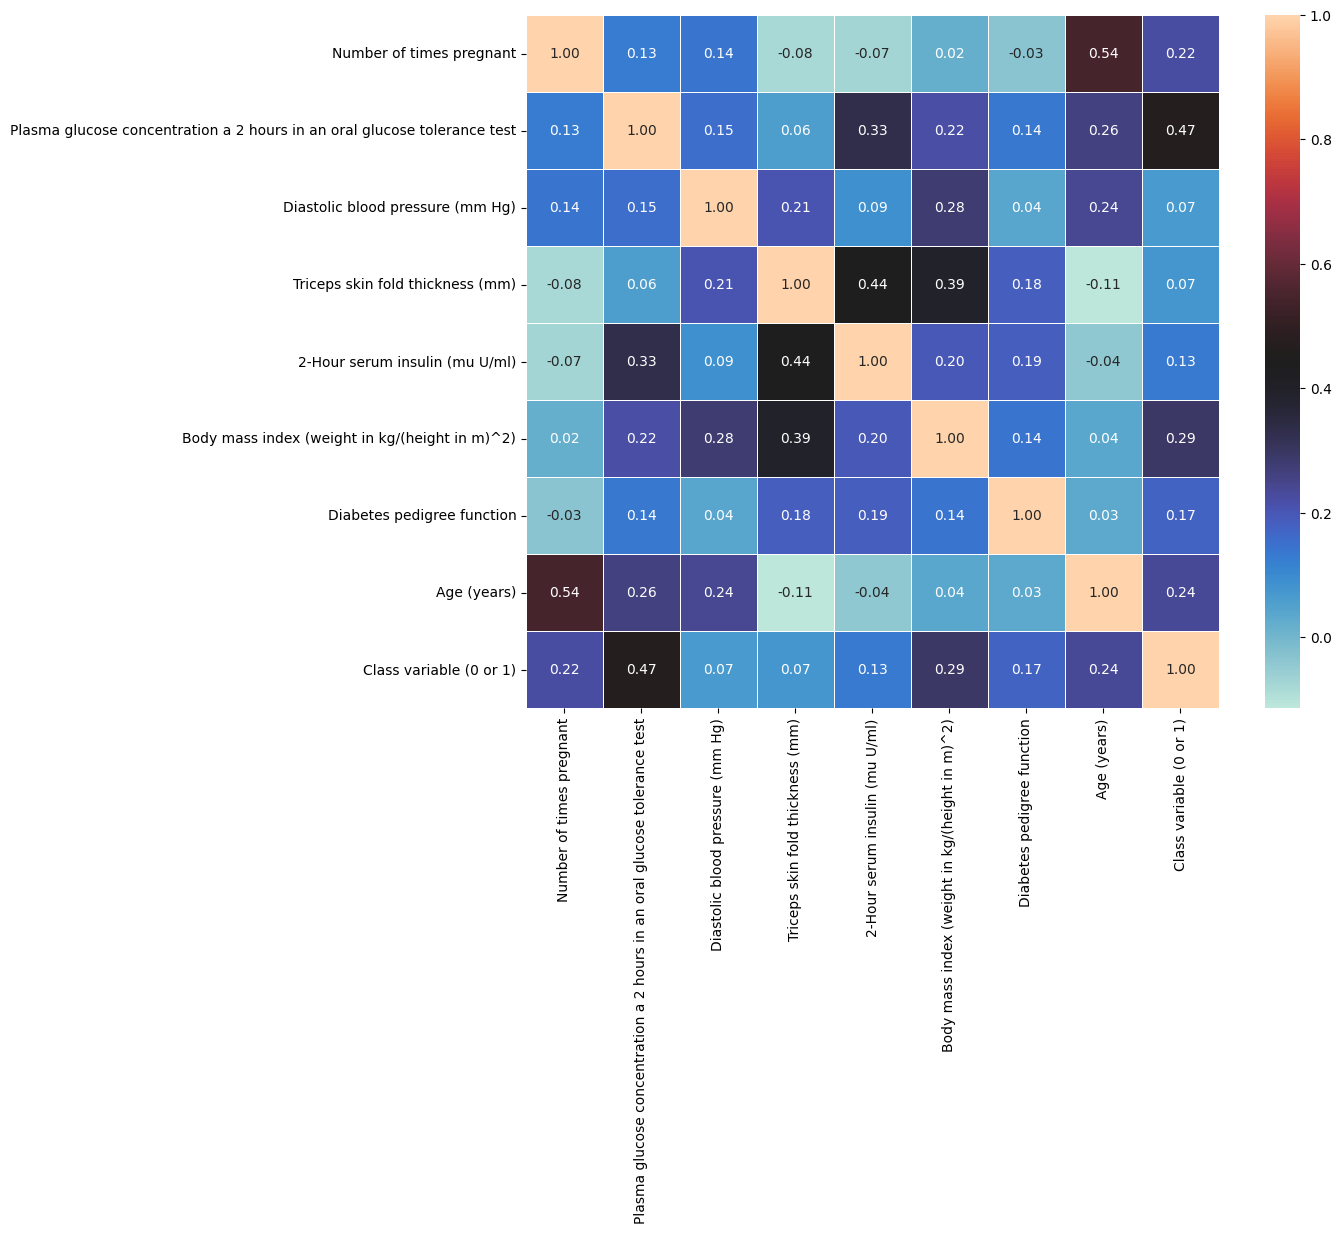

In [9]:
# корреляции признаков
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask = np.zeros_like(corr, dtype=bool), \
            cmap = sns.color_palette('icefire', as_cmap=True), square=True)

In [11]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
# сбалансированность выборки - не очень сбалансированно

y.value_counts()

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

In [14]:
# пайплайн
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])


In [15]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       406
           1       0.60      0.74      0.66       170

    accuracy                           0.77       576
   macro avg       0.74      0.76      0.74       576
weighted avg       0.79      0.77      0.78       576
               precision    recall  f1-score   support

           0       0.84      0.83      0.83       135
           1       0.60      0.61      0.61        57

    accuracy                           0.77       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.77      0.77      0.77       192



In [16]:
# дропну признаки с самой низкой корреляцией
data.drop(['Triceps skin fold thickness (mm)', 'Diastolic blood pressure (mm Hg)'], axis= 1, inplace= True) 

In [18]:
# и попробую добавить баланса
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [19]:
# посмотрим теперь
pipe = Pipeline([('Scaler', StandardScaler()), ('model', LogisticRegression())])
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       419
           1       0.56      0.71      0.63       157

    accuracy                           0.77       576
   macro avg       0.72      0.75      0.73       576
weighted avg       0.79      0.77      0.78       576
               precision    recall  f1-score   support

           0       0.90      0.82      0.86       138
           1       0.63      0.78      0.69        54

    accuracy                           0.81       192
   macro avg       0.77      0.80      0.78       192
weighted avg       0.83      0.81      0.81       192



Точность немного улучшилась

In [20]:
model = LogisticRegression(solver='liblinear', class_weight='balanced')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       341
           1       0.75      0.64      0.69       235

    accuracy                           0.77       576
   macro avg       0.76      0.75      0.75       576
weighted avg       0.77      0.77      0.76       576
               precision    recall  f1-score   support

           0       0.77      0.86      0.81       111
           1       0.78      0.64      0.70        81

    accuracy                           0.77       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.77      0.77      0.77       192



## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [64]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


Пытаемся по характеристикам человека понять, купит он велик или нет. 

In [65]:
# id сразу дропнем
data.drop('ID', axis= 1, inplace= True) 

In [66]:
data.info() # пропусков нет, так что переведу просто всё в числа

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Marital Status    1000 non-null   object
 1   Gender            1000 non-null   object
 2   Income            1000 non-null   int64 
 3   Children          1000 non-null   int64 
 4   Education         1000 non-null   object
 5   Occupation        1000 non-null   object
 6   Home Owner        1000 non-null   object
 7   Cars              1000 non-null   int64 
 8   Commute Distance  1000 non-null   object
 9   Region            1000 non-null   object
 10  Age               1000 non-null   int64 
 11  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(8)
memory usage: 93.9+ KB


In [67]:
# проверяю варианты значений в колонках
print(f"{set(data['Marital Status'])}\n{set(data['Gender'])}\n{set(data['Education'])}\n{set(data['Occupation'])}\n{set(data['Home Owner'])}\n{set(data['Commute Distance'])}\n{set(data['Region'])}")


{'Married', 'Single'}
{'Male', 'Female'}
{'Graduate Degree', 'Partial College', 'Bachelors', 'Partial High School', 'High School'}
{'Skilled Manual', 'Professional', 'Management', 'Manual', 'Clerical'}
{'No', 'Yes'}
{'10+ Miles', '5-10 Miles', '1-2 Miles', '2-5 Miles', '0-1 Miles'}
{'Pacific', 'Europe', 'North America'}


In [68]:
categ_columns = data.select_dtypes(['object']).columns  
data[categ_columns] = data[categ_columns].apply (lambda x: pd.factorize(x)[0])

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Marital Status    1000 non-null   int64
 1   Gender            1000 non-null   int64
 2   Income            1000 non-null   int64
 3   Children          1000 non-null   int64
 4   Education         1000 non-null   int64
 5   Occupation        1000 non-null   int64
 6   Home Owner        1000 non-null   int64
 7   Cars              1000 non-null   int64
 8   Commute Distance  1000 non-null   int64
 9   Region            1000 non-null   int64
 10  Age               1000 non-null   int64
 11  Purchased Bike    1000 non-null   int64
dtypes: int64(12)
memory usage: 93.9 KB


<Axes: >

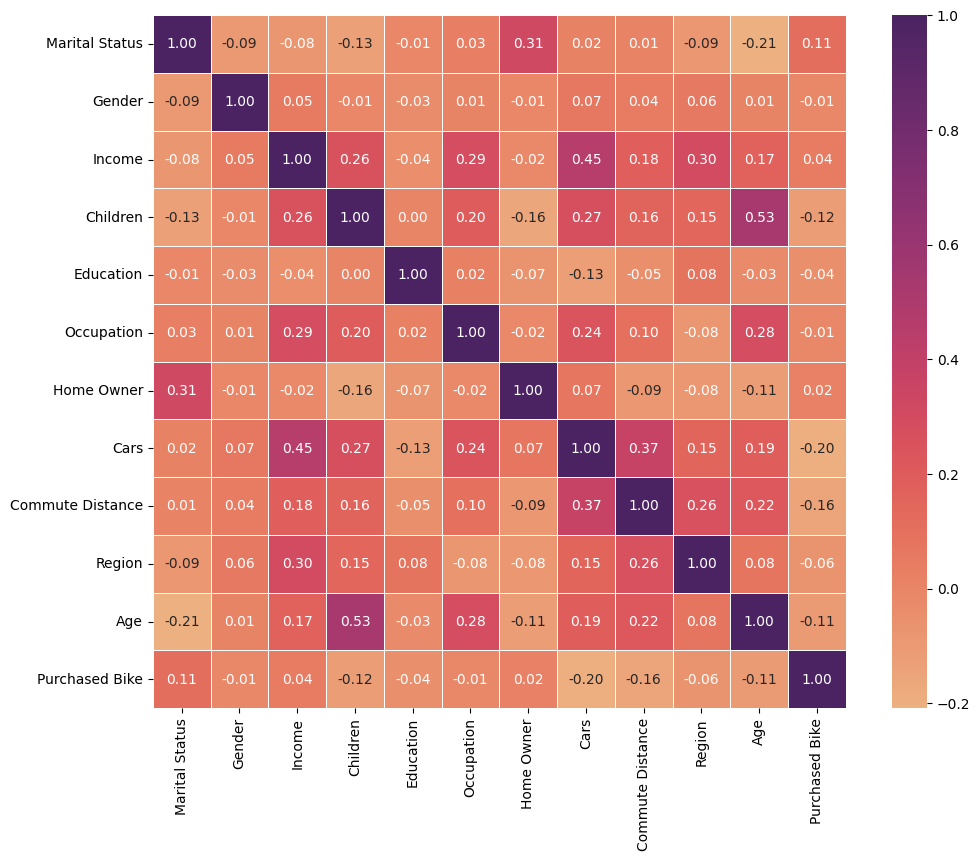

In [70]:
# корреляции признаков
plt.figure(figsize=(12, 9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask = np.zeros_like(corr, dtype=bool), \
            cmap = sns.color_palette('flare', as_cmap=True), square=True)

In [72]:
#разделим
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [73]:
# довольно сбалансированная
y.value_counts()

Purchased Bike
0    519
1    481
Name: count, dtype: int64

In [74]:
# пайплайн
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

In [75]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.68      0.65      0.66       409
           1       0.60      0.63      0.61       341

    accuracy                           0.64       750
   macro avg       0.64      0.64      0.64       750
weighted avg       0.64      0.64      0.64       750
               precision    recall  f1-score   support

           0       0.74      0.68      0.71       140
           1       0.63      0.69      0.66       110

    accuracy                           0.68       250
   macro avg       0.68      0.68      0.68       250
weighted avg       0.69      0.68      0.69       250



In [76]:
# теперь дропну некоторые признаки

data.drop(['Gender', 'Occupation', 'Income'], axis= 1, inplace= True) 

In [77]:
# попробуем ещё

X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

# стало хуже...

              precision    recall  f1-score   support

           0       0.61      0.62      0.61       378
           1       0.61      0.60      0.60       372

    accuracy                           0.61       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.61      0.61      0.61       750
               precision    recall  f1-score   support

           0       0.64      0.66      0.65       132
           1       0.61      0.59      0.60       118

    accuracy                           0.63       250
   macro avg       0.63      0.63      0.63       250
weighted avg       0.63      0.63      0.63       250



In [79]:
# дропну ещё 2 и Age (коррелирует с children)
data.drop(['Home Owner', 'Age', 'Education'], axis= 1, inplace= True) 

In [80]:
# попробуем ещё

X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.61      0.61      0.61       381
           1       0.60      0.59      0.60       369

    accuracy                           0.60       750
   macro avg       0.60      0.60      0.60       750
weighted avg       0.60      0.60      0.60       750
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       140
           1       0.50      0.53      0.52       110

    accuracy                           0.56       250
   macro avg       0.56      0.56      0.56       250
weighted avg       0.57      0.56      0.56       250



In [81]:
data.drop(['Region'], axis= 1, inplace= True) 

In [82]:
# попробуем ещё

X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       425
           1       0.55      0.59      0.57       325

    accuracy                           0.61       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.61      0.61      0.61       750
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       144
           1       0.46      0.58      0.51       106

    accuracy                           0.54       250
   macro avg       0.54      0.54      0.53       250
weighted avg       0.55      0.54      0.54       250

